In [8]:


import tensorflow as tf 
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn import metrics
import numpy as np
import matplotlib .pyplot as plt
import seaborn as sns 
import random 
%matplotlib inline
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings("ignore")

In [12]:
def load_and_preprocess_data():
    (trainX, trainY), (testX, testY) = tf.keras.datasets.fashion_mnist.load_data()
      # Reshape the training and testing images to have a shape of (number of samples, 28, 28, 1)
      #1 at the end indicates that the images are grayscale (i.e., they have only one channel). 
    trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
    testX = testX.reshape((testX.shape[0], 28,28, 1))
    # Convert training and testing labels to categorical format using one-hot encoding
    #It creates an array where each label is represented as a binary vector of length 10 (since there are 10 classes in the MNIST Fashion Dataset), with a 1 in the position corresponding to the class label and 0 in all other positions.
    trainY_cat = tf.keras.utils.to_categorical(trainY)
    testY_cat = tf.keras.utils.to_categorical(testY)
    # Convert pixel values of training and testing images to floating point format and normalize them to the range [0, 1]
    train_norm= trainX.astype('float32')/255.0
    test_norm = testX.astype('float32')/255.0
   
    return train_norm, trainY_cat, test_norm, testY_cat
   

In [34]:
def create_cnn_model():
    model= tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(64, kernel_size=(3,3), input_shape=(28,28,1), activation='relu', padding='same', name='conv-layer-1'),
        tf.keras.layers.AvgPool2D(pool_size=(2,2), name='pooling-layer-1'),
        tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same', name='conv-layer-2'),
        tf.keras.layers.AvgPool2D(pool_size=(2,2), name='pooling-layer-2'),
        tf.keras.layers.GlobalAveragePooling2D(name='pooling-layer-3'),
        tf.keras.layers.Dense(10, activation='softmax', name='output-layer')
    ])
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

In [35]:
def train_model(model, trainX, trainY_cat, testX, testY_cat, epochs=10):
    history = model.fit(trainX, trainY_cat, epochs=epochs, validation_data = (testX, testY_cat))
    return history

In [36]:
def visualize_random_predictions(model, testX, testY_cat, class_names):
    images=[]  #empty list to store the images.
    labels=[]  #empty list to store the true labels.
    random_indices = random.sample(range(len(testX)),10)
    # enerates a list of 10 unique random indices from the test set. These indices will be used to select random images for visualization.
    
    for idx in random_indices:
        # Append the image and its true label to the lists
        images.append(testX[idx])
        labels.append(testY_cat[idx])
    #Converts the lists of images and labels into NumPy arrays for easier manipulation.
    images=np.array(images)
    labels=np.array(labels)
     # Create a new figure with a size of 20x8 inches
    fig = plt.figure(figsize=(20,8))
    # Define the number of rows and columns for the subplot grid
    rows, cols =2, 5
    x=1
    
    for image, label in zip(images,labels):
        # Add a subplot to the figure at position (rows, cols, x)
        fig.add_subplot(rows,cols,x)
         # Make a prediction on the current image using the model. The image is expanded along the batch dimension using tf.expand_dims to match the model's input shape.
        prediction = model.predict(tf.expand_dims(image,axis=0))
        
         # Extract the predicted label and true label from their one-hot encoded representations
        predicted_label = class_names[tf.argmax(prediction.flatten())]
        true_label = class_names[tf.argmax(label)]
        
          # Set subplot title to display true and predicted labels
        plt.title(f"True Label: {true_label}, Predicted Label: {predicted_label}")
       
       # Plot the image and normalize pixel values to [0, 1]
        plt.imshow(image/255.)
        # Turn off axis for the current subplot
        plt.axis("off")
         # Increment subplot position counter
        x+=1
     
        
        
                        

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.4303 - loss: 1.5647 - val_accuracy: 0.7136 - val_loss: 0.8540
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.7171 - loss: 0.8185 - val_accuracy: 0.7303 - val_loss: 0.7717
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.7474 - loss: 0.7254 - val_accuracy: 0.7637 - val_loss: 0.6961
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.7634 - loss: 0.6798 - val_accuracy: 0.7695 - val_loss: 0.6622
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.7691 - loss: 0.6543 - val_accuracy: 0.7758 - val_loss: 0.6337
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.7812 - loss: 0.6227 - val_accuracy: 0.7836 - val_loss: 0.6147
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.7930 - loss: 0.5937 - val_accuracy: 0.8002 - val_loss: 0.5834
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.7998 - loss: 

ValueError: num must be an integer with 1 <= num <= 12, not 13

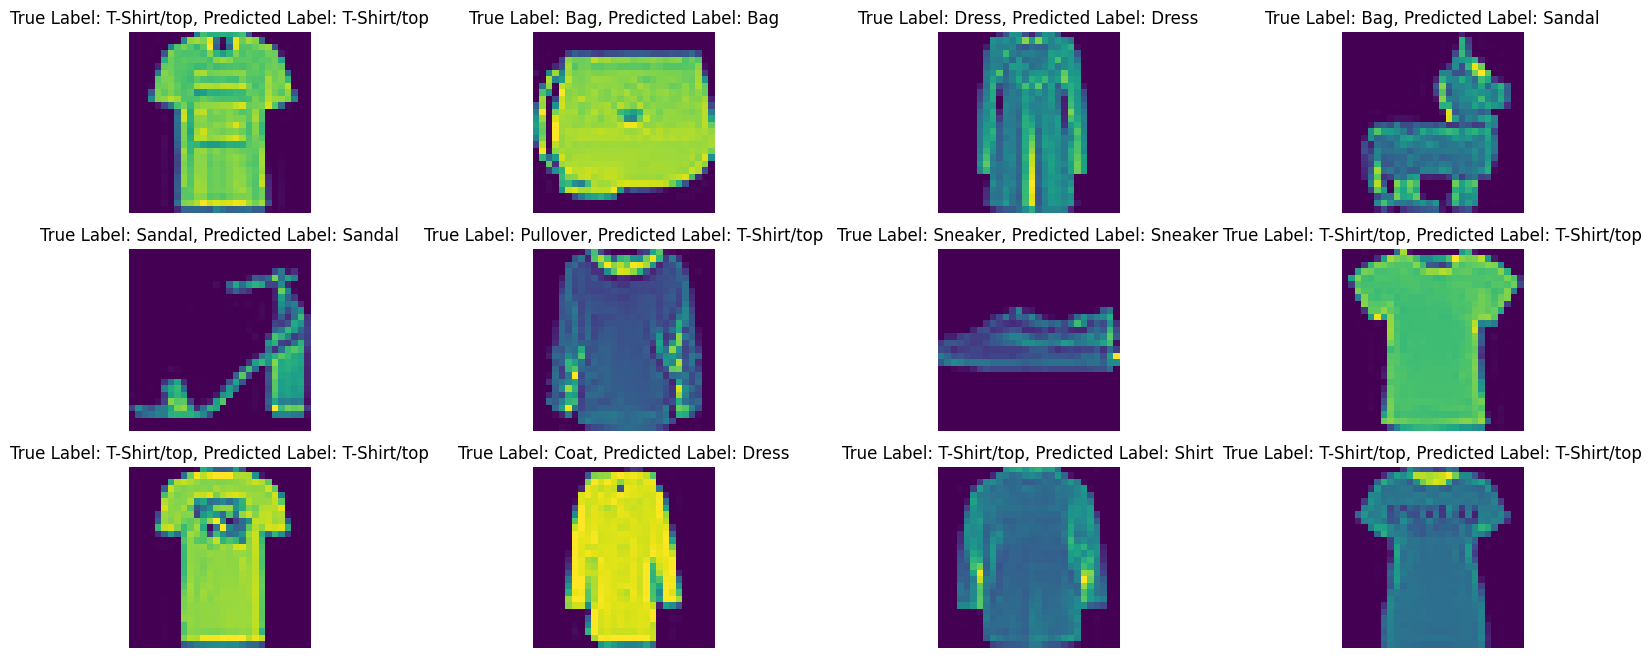

In [37]:
trainX, trainY_cat, testX, testY_cat = load_and_preprocess_data()
class_names=['T-Shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
model = create_cnn_model()
history = train_model(model, trainX, trainY_cat, testX, testY_cat, epochs=10)
visualize_random_predictions(model, testX, testY_cat, class_names)

In [38]:
class_names

['T-Shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']